DATA From : https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package?resource=download

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import is_string_dtype, is_numeric_dtype

df = pd.read_csv("/Users/alexshi/Documents/weatherAUS.csv", header = 0)

In [3]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [7]:
df.isnull().sum()
missing_count = df.isnull().sum()
value_count = df.isnull().count()
missing_percentage = round(missing_count/value_count*100,2)
missing_df = pd.DataFrame({'count': missing_count,'percentage': missing_percentage})
print(missing_df)

               count  percentage
Date               0        0.00
Location           0        0.00
MinTemp         1485        1.02
MaxTemp         1261        0.87
Rainfall        3261        2.24
Evaporation    62790       43.17
Sunshine       69835       48.01
WindGustDir    10326        7.10
WindGustSpeed  10263        7.06
WindDir9am     10566        7.26
WindDir3pm      4228        2.91
WindSpeed9am    1767        1.21
WindSpeed3pm    3062        2.11
Humidity9am     2654        1.82
Humidity3pm     4507        3.10
Pressure9am    15065       10.36
Pressure3pm    15028       10.33
Cloud9am       55888       38.42
Cloud3pm       59358       40.81
Temp9am         1767        1.21
Temp3pm         3609        2.48
RainToday       3261        2.24
RainTomorrow    3267        2.25


probably should drop columns with a lot of missing data
    

In [8]:
df = df.drop(['Evaporation', 'Sunshine','Cloud3pm','Cloud9am'], axis = 1)
df = df.dropna(subset = ['RainTomorrow'])

this drops the rows with a missing label and the row with missing dadta greater than 25%

In [11]:
num_list = []
cat_list = []

for column in df: 
    if column != 'RainTomorrow':
        if is_numeric_dtype(df[column]):
            num_list.append(column)
        elif is_string_dtype(df[column]):
            cat_list.append(column)
            

print(num_list)
print(cat_list)
        

['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']
['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']


shows list of numerial variables and cat variables


In [13]:
df.fillna(df.mean(), inplace = True)

/var/folders/wz/vs470twx5ms8cbqh4kby2fy40000gn/T/ipykernel_45600/2622515659.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace = True)


puts means in place for mising numerical values

In [15]:
for i in (cat_list):
    if df[i].isnull().any():
        df[i].fillna("Unknown", inplace = True)

puts unknown for mising categorial values


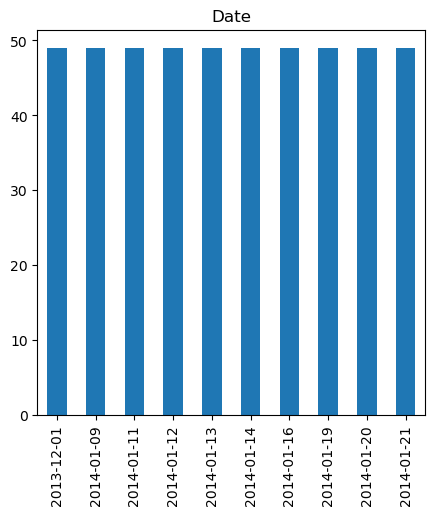

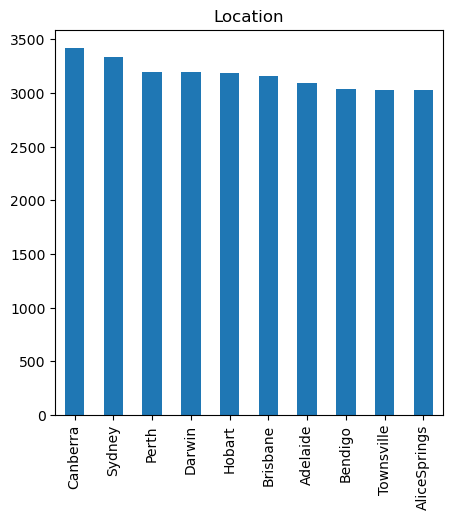

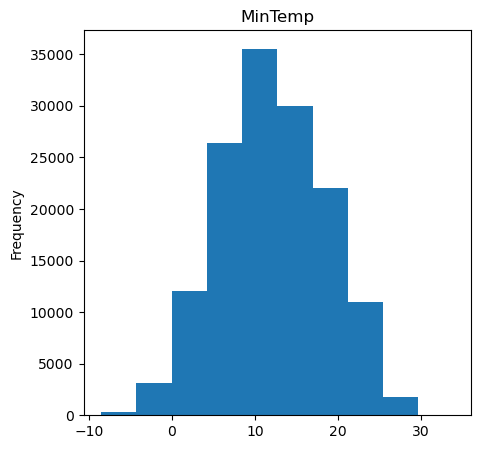

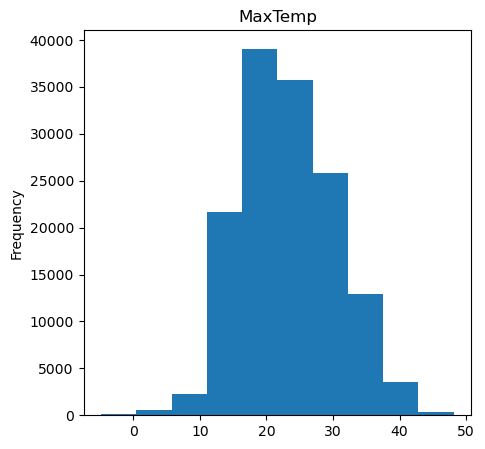

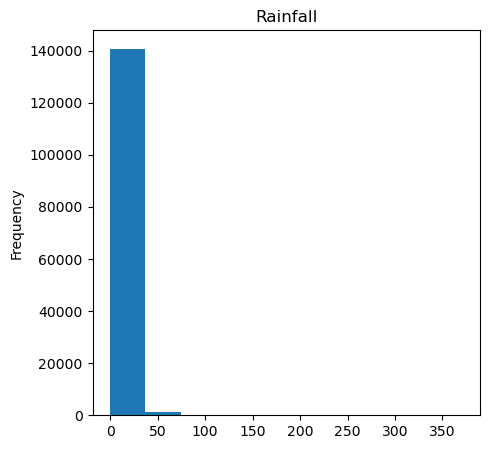

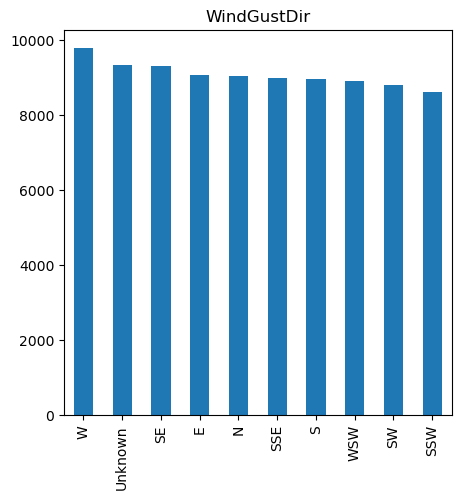

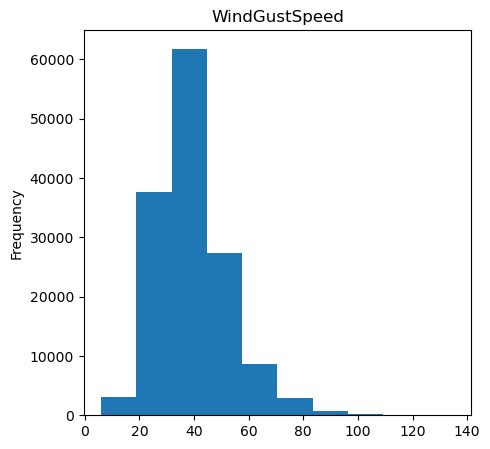

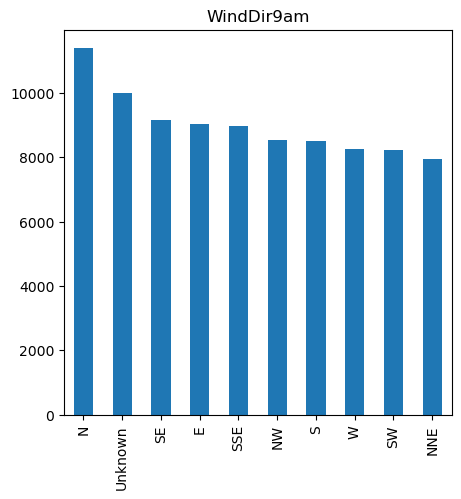

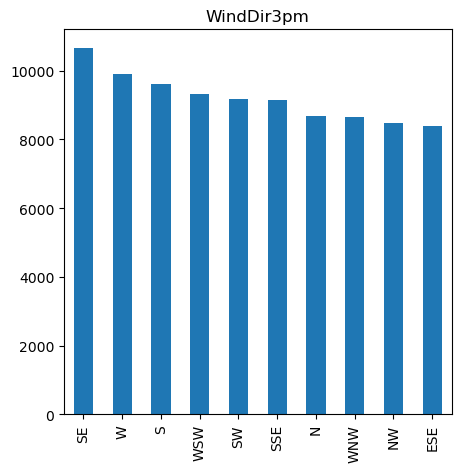

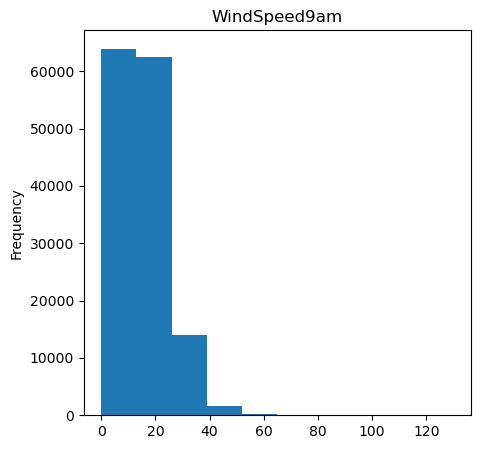

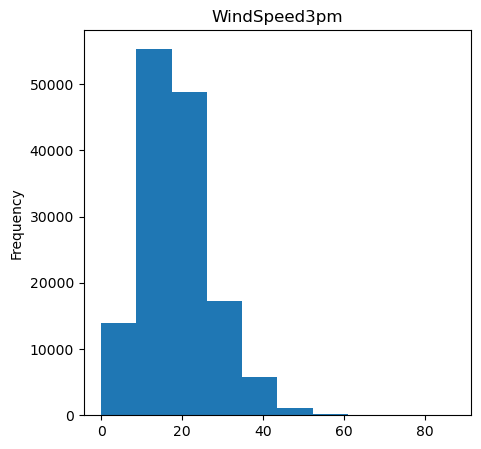

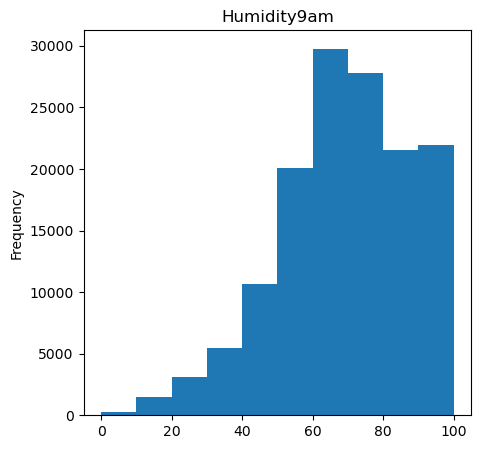

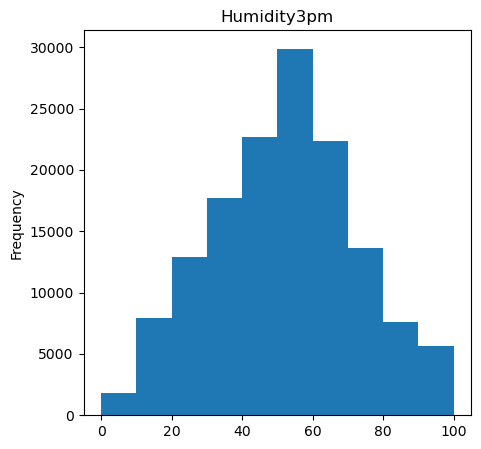

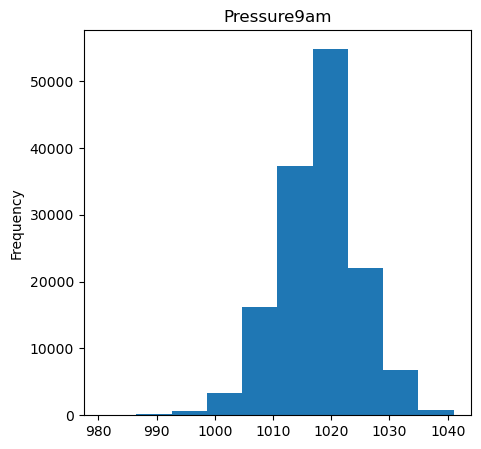

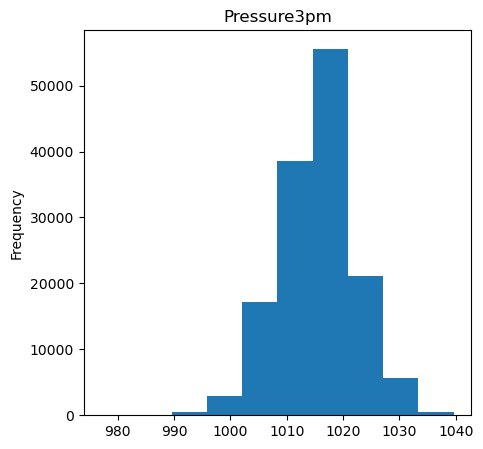

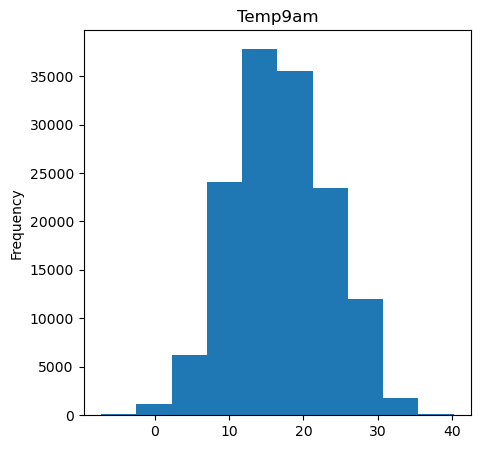

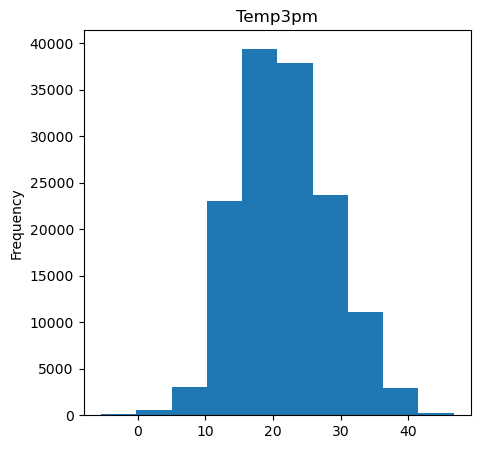

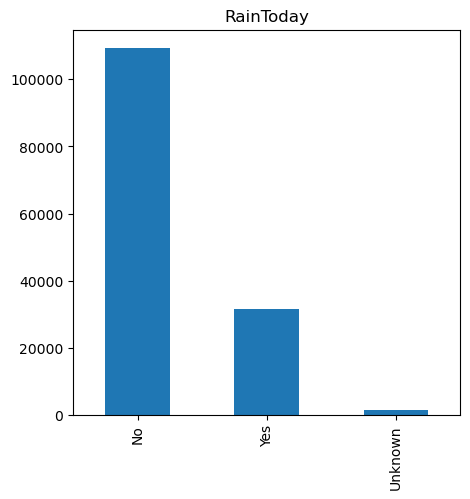

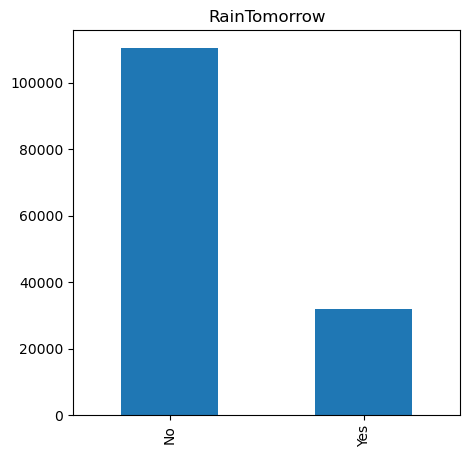

In [17]:
for column in df:
    plt.figure(column, figsize = (5,5))
    plt.title(column)
    if is_numeric_dtype(df[column]):
        df[column].plot(kind = 'hist')
    elif is_string_dtype(df[column]):
            df[column].value_counts()[:10].plot(kind = 'bar') 


shows datadistribution,,,bar charts for cat, shows hist for numericals

eliminating outliers:

(127798, 19)

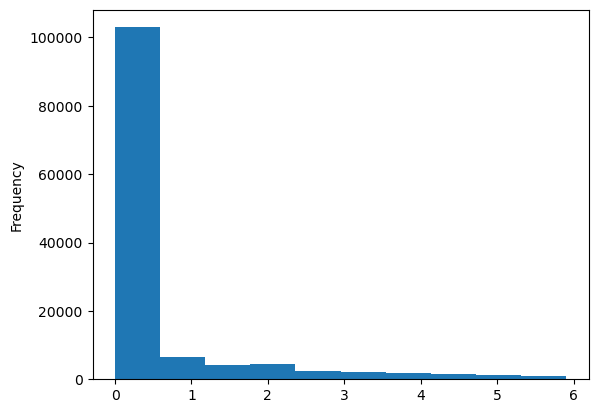

In [18]:
maximum = df['Rainfall'].quantile(0.9)
df=df[df["Rainfall"] < maximum]
df["Rainfall"].plot(kind = 'hist')
df.shape

needs transformation, changing time frame from date to month

<Axes: >

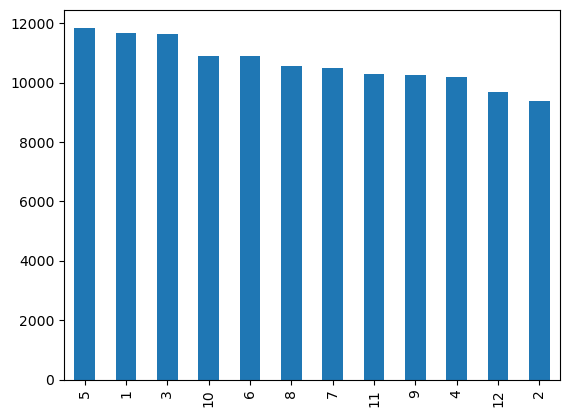

In [19]:
df['Month'] = pd.to_datetime(df['Date']).dt.month.apply(str)
df['Month'].value_counts().plot(kind = 'bar')

In [20]:
from sklearn.preprocessing import LabelEncoder

categorical_features = ['Location', 'WindGustDir', 'WindDir9am','WindDir3pm','RainToday', 'Month', 'RainTomorrow']

for i in categorical_features:
    df[i] = LabelEncoder().fit_transform(df[i])

this turns all my categorical variables into dummy variables so they are now numerical, compatible with a logistic regression model

/var/folders/wz/vs470twx5ms8cbqh4kby2fy40000gn/T/ipykernel_45600/3423139797.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


<Axes: >

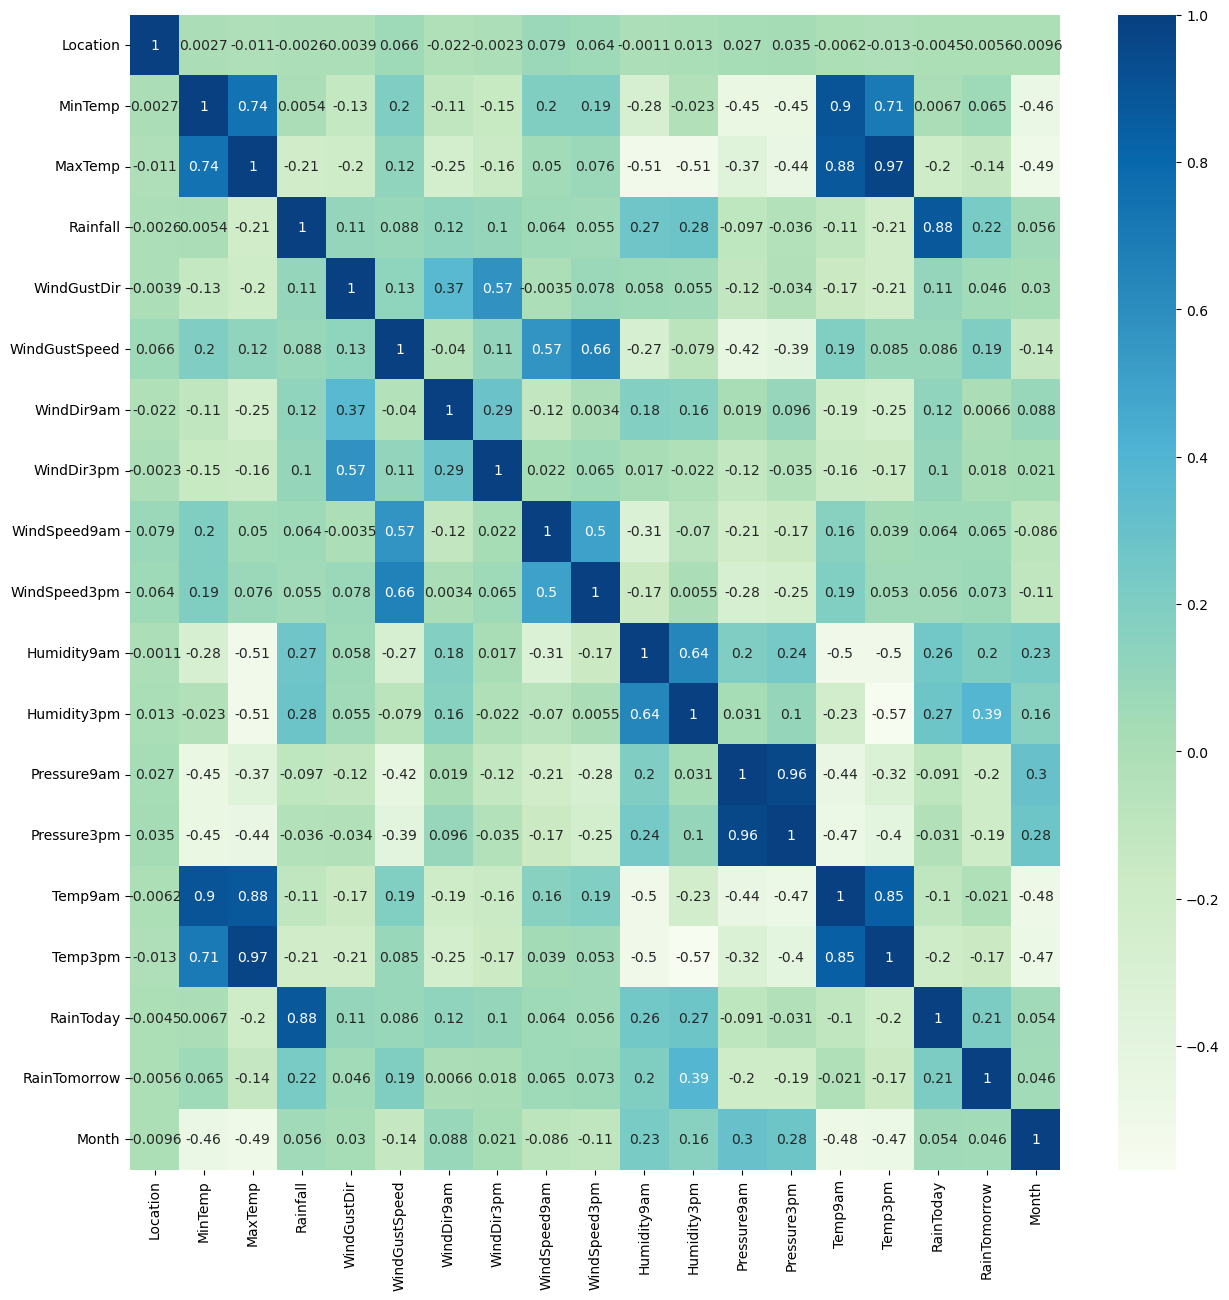

In [21]:
plt.figure(1,figsize = (15,15))
correlation = df.corr()
sns.heatmap(correlation,cmap = "GnBu", annot = True)

correlation analysis plot to determine highl correlated variables. 


In [22]:
df = df[['Month','Location','MinTemp','MaxTemp', 'WindGustDir','WindGustSpeed','WindDir9am','WindDir3pm','WindSpeed9am','WindSpeed3pm','Humidity3pm','Pressure3pm','RainToday','RainTomorrow']]

this creates new df with all the relevant and potential predictrs to predict rain tomorrow

In [25]:
X = df.iloc[:,:-1]
y = df["RainTomorrow"]

selects all predictors and selects target column

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.33, random_state = 42)

In [28]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(85624, 13) (42174, 13) (85624,) (42174,)


this is the training and testing model


In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
reg = LogisticRegression(max_iter = 300)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [36]:
reg

LogisticRegression(max_iter=300)

In [47]:
print( metrics.accuracy_score(y_test, y_pred))

0.8500972162943994


accuracy of 85% when predicting if it will rain depending on the predictors

In [49]:
df

,Month,Location,MinTemp,MaxTemp,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity3pm,Pressure3pm,RainToday,RainTomorrow
0,3,2,13.4,22.9,14,44.0,14,15,20.0,24.0,22.0,1007.1,0,0
1,3,2,7.4,25.1,15,44.0,6,16,4.0,22.0,25.0,1007.8,0,0
2,3,2,12.9,25.7,16,46.0,14,16,19.0,26.0,30.0,1008.7,0,0
3,3,2,9.2,28.0,4,24.0,9,0,11.0,9.0,16.0,1012.8,0,0
4,3,2,17.5,32.3,14,41.0,1,7,7.0,20.0,33.0,1006.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,8,41,3.5,21.8,0,31.0,2,0,15.0,13.0,27.0,1021.2,0,0
145455,8,41,2.8,23.4,0,31.0,9,1,13.0,11.0,24.0,1020.3,0,0
145456,8,41,3.6,25.3,6,22.0,9,3,13.0,9.0,21.0,1019.1,0,0
145457,8,41,5.4,26.9,3,37.0,9,15,9.0,9.0,24.0,1016.8,0,0


0.8235722038411278


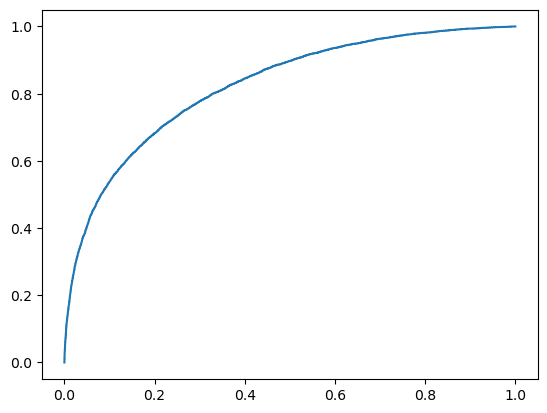

In [51]:
y_pred_prob = reg.predict_proba(X_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr,tpr)

auc = metrics.roc_auc_score(y_test, y_pred_prob)
print(auc)

auc is area under the curve, this graph shows the performance of the model at different thresholds of true positive rate to false positive rate

In this case, this is good as it is more accurate. if it were a straight line, it would be random. This model can predict if it will rain tomorrow, given the 	Month	Location	MinTemp	MaxTemp	WindGustDir	WindGustSpeed	WindDir9am	WindDir3pm	WindSpeed9am	WindSpeed3pm	Humidity3pm	Pressure3pm	RainToday